# Company Financials Dataset

Este conjunto de datos es un archivo que representa un resumen de ventas y beneficios por mercado, país/región, producto y otros factores clave. 

A continuación se presenta un desglose detallado de cada columna: 

* **Segment**: Representa el segmento de mercado (*e.g., Government, Midmarket, Enterprise*). Sirve para identificar la contribución de cada segmento al total de las ventas y beneficios.
* **Country**: Es el país o región donde se realizaron las ventas. Permite localizar los mercados más fuertes geográficamente.
* **Product**: El tipo de producto vendido (*e.g., Carretera, Montana, Paseo*). Esto ayuda a analizar qué productos son los más populares y rentables.
* **Discount Band**: Representa el nivel de descuento aplicado. En este caso, parece que todos los descuentos son "None", lo que indica que no hubo descuentos aplicados directamente.
* **Units Sold**: El número de unidades vendidas. Es un factor clave para calcular las métricas de ventas y beneficios.
* **Manufacturing Price**: El costo de fabricación por unidad del producto. Sirve para calcular márgenes de ganancia.
* **Sale Price**: El precio de venta por unidad. Refleja la estrategia de precios de la empresa.
* **Gross Sales**: Ingresos brutos generados antes de aplicar descuentos. Calculado como:

        Gross Sales = Units Sold x Sale Price

* **Discounts**: Los descuentos totales aplicados. En este dataset aparecen como $-, lo que implica que no hubo descuentos registrados.
* **Sales**: Ventas netas, después de descuentos. En este caso, como no hay descuentos, **Gross Sales = Sales**.
* **COGS** (Cost of Goods Sold): El costo de los bienes vendidos. Calculado como:

        COGS = Units Sold x Manufacturing Price

* **Profit**: La ganancia neta obtenida. Calculada como:

        Profit = Sales - COGS

* **Date, Month Number, Month Name, Year**: Información temporal que detalla cuándo se realizó la venta. Esto es útil para identificar tendencias estacionales y patrones de compra.

## Lectura de Datos

In [53]:
# pip install pandas matplotlib seaborn plotly geopandas folium


In [54]:
import csv as csv
from statistics import mean
import pandas as pd

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium

In [56]:
datos_df = pd.read_csv('./data/Financials.csv')
datos_df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [57]:
from IPython.display import display
display(datos_df)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014


### Información general y descripción estadística

In [58]:
#Column type
datos_df.dtypes

Segment                  object
Country                  object
 Product                 object
 Discount Band           object
 Units Sold              object
 Manufacturing Price     object
 Sale Price              object
 Gross Sales             object
 Discounts               object
  Sales                  object
 COGS                    object
 Profit                  object
Date                     object
Month Number              int64
 Month Name              object
Year                      int64
dtype: object

In [59]:
print(datos_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [60]:
datos_df.describe()

,Month Number,Year
count,700.000000,700.000000
mean,7.900000,2013.750000
std,3.377321,0.433322
min,1.000000,2013.000000
25%,5.750000,2013.750000
50%,9.000000,2014.000000
75%,10.250000,2014.000000
max,12.000000,2014.000000


## Preprocesamiento

### Limpieza de Datos

Se comenzará el preprocesamiento de los datos con una limpieza básica de ellos. El primer paso será modificar el nombre de las columnas para después detectar la existencia de valores nulos en el conjunto de datos:

In [61]:
datos_df = datos_df.rename(columns = {
    'Segment': 'segment',
    'Country': 'country',
    ' Product ': 'product',
    ' Discount Band ': 'discount_band',
    ' Units Sold ': 'units_sold',
    ' Manufacturing Price ': 'manufacturing_price',
    ' Sale Price ': 'sale_price',
    ' Gross Sales ': 'gross_sales',
    ' Discounts ': 'discounts',
    '  Sales ': 'sales',
    ' COGS ': 'cogs',
    ' Profit ': 'profit',
    'Date': 'date',
    'Month Number': 'month_number',
    ' Month Name ': 'month_name',
    'Year': 'year'
})

In [62]:

datos_df.isnull().sum()

segment                0
country                0
product                0
discount_band          0
units_sold             0
manufacturing_price    0
sale_price             0
gross_sales            0
discounts              0
sales                  0
cogs                   0
profit                 0
date                   0
month_number           0
month_name             0
year                   0
dtype: int64

No existe ningún valor nulo o faltante en nuestro CSV. 


A continuación se muestra una fila completa del conjutno de datos:

Midmarket,France, Paseo , None , $549.00 , $10.00 , $15.00 ," $8,235.00 ", $-   ," $8,235.00 "," $5,490.00 "," $2,745.00 ",01/09/2013,9, September ,2013

Como puede observarse, existen carácteres especiales que han de ser eliminados del dataset para poder trabajar de forma correcta con los datos, además, el valor de la cuarta columna, en muchos ejemplos toma valor "none", valor que habrá que estudiar más adelante.

Se muestra entonces, punto por punto, los pasos a seguir hasta dar con un dataset completamente funcional:



#### Eliminar espacios en blanco de las columnas.

In [63]:
datos_df.columns = datos_df.columns.str.strip()
datos_df.columns

Index(['segment', 'country', 'product', 'discount_band', 'units_sold',
       'manufacturing_price', 'sale_price', 'gross_sales', 'discounts',
       'sales', 'cogs', 'profit', 'date', 'month_number', 'month_name',
       'year'],
      dtype='object')

#### Identificar y limpiar columnas numéricas

In [64]:
numeric_columns = [
    'units_sold', 'manufacturing_price', 'sale_price',
    'gross_sales', 'discounts', 'sales', 'cogs', 'profit'
]

Recordemos los valores que toman dichas columnas numéricas:


In [65]:
print(datos_df[numeric_columns])

      units_sold manufacturing_price sale_price     gross_sales  \
0     $1,618.50               $3.00     $20.00      $32,370.00    
1     $1,321.00               $3.00     $20.00      $26,420.00    
2     $2,178.00               $3.00     $15.00      $32,670.00    
3       $888.00               $3.00     $15.00      $13,320.00    
4     $2,470.00               $3.00     $15.00      $37,050.00    
..           ...                 ...        ...             ...   
695   $2,475.00             $260.00    $300.00    $7,42,500.00    
696     $546.00             $260.00    $300.00    $1,63,800.00    
697   $1,368.00               $5.00      $7.00       $9,576.00    
698     $723.00              $10.00      $7.00       $5,061.00    
699   $1,806.00             $250.00     $12.00      $21,672.00    

          discounts           sales            cogs        profit  
0             $-        $32,370.00      $16,185.00    $16,185.00   
1             $-        $26,420.00      $13,210.00    $13,2

A simple vista puede observarse que existen carácteres como "$", ",", "/" o espacios que serán eliminados a continuación:


In [66]:
for col in numeric_columns:
    datos_df[col] = (
        datos_df[col]
        .astype(str)
        .str.replace(',', '', regex=False)       # Eliminar comas
        .str.replace(r'\(|\)', '', regex=True)  # Eliminar paréntesis
        .str.replace(r'\$', '', regex=True)     # Eliminar signos de dólar
        .str.replace('-', '0', regex=False)     # Reemplazar guiones con ceros
        .str.strip()                            # Eliminar espacios
        .astype(float)                          # Convertir a flotante
    )

In [67]:
print(datos_df)

              segment                   country      product discount_band  \
0          Government                    Canada   Carretera          None    
1          Government                   Germany   Carretera          None    
2           Midmarket                    France   Carretera          None    
3           Midmarket                   Germany   Carretera          None    
4           Midmarket                    Mexico   Carretera          None    
..                ...                       ...          ...           ...   
695    Small Business                    France    Amarilla          High    
696    Small Business                    Mexico    Amarilla          High    
697        Government                    Mexico     Montana          High    
698        Government                    Canada       Paseo          High    
699  Channel Partners  United States of America         VTT          High    

     units_sold  manufacturing_price  sale_price  gross_sales  

El segundo paso entonces será asegurarnos de que la fecha está en un formato correcto:

In [68]:
datos_df['date'] = pd.to_datetime(datos_df['date'], format='%d/%m/%Y')

In [69]:
print(datos_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   segment              700 non-null    object        
 1   country              700 non-null    object        
 2   product              700 non-null    object        
 3   discount_band        700 non-null    object        
 4   units_sold           700 non-null    float64       
 5   manufacturing_price  700 non-null    float64       
 6   sale_price           700 non-null    float64       
 7   gross_sales          700 non-null    float64       
 8   discounts            700 non-null    float64       
 9   sales                700 non-null    float64       
 10  cogs                 700 non-null    float64       
 11  profit               700 non-null    float64       
 12  date                 700 non-null    datetime64[ns]
 13  month_number         700 non-null  

#### Reemplazo de valores en 'product' para mejorar el análisis y entendimiento del proyecto

Debido a que los productos de la columna 'product' resultan complicados de interpretar, se ha optado por hacer una permuta de ellos. Teniendo en cuenta el precio de producción y el precio de venta de cada uno de ellos, se ha llegado al siguiente acuerdo: 

1. **Amarilla** pasará a ser un **Teclado inalámbrico compacto**
Manufacturing Price: 260 USD
Descripción: Amarilla es un teclado inalámbrico compacto y ergonómico, diseñado para usuarios que buscan una experiencia de escritura fluida y cómoda. Con un diseño minimalista y teclas silenciosas, este teclado es perfecto para profesionales que necesitan un dispositivo confiable tanto en la oficina como en casa. La conectividad Bluetooth permite usarlo con una amplia variedad de dispositivos, incluyendo laptops, tablets y teléfonos móviles.

Razonamiento: Con un precio de fabricación elevado, este teclado combina características premium como la retroiluminación ajustable y la ergonomía avanzada, lo que lo convierte en la opción ideal para usuarios exigentes que valoran la comodidad y la funcionalidad en su equipo de trabajo.

2. **Carretera** pasará a ser un **Altavoz Bluetooth portátil básico**
Manufacturing Price: 3 USD
Descripción: Carretera es un altavoz Bluetooth compacto y económico perfecto para reproducir música o realizar llamadas mientras viajas. Ideal para escuchar en el auto, en el parque o en cualquier espacio al aire libre.

Razonamiento: Un producto sencillo, económico y funcional, diseñado para usuarios que buscan un altavoz básico sin muchas complicaciones.

3. **Montana** pasará a ser un **Termómetro de cocina digital**
Manufacturing Price: 5 USD
Descripción: Montana es un termómetro de cocina digital diseñado para medir la temperatura de alimentos con rapidez y precisión. Es ideal para quienes buscan mantener una alimentación saludable y cocinar con exactitud.

Razonamiento: Dispositivo básico y de bajo costo, pero muy útil para aficionados de la cocina y la comida saludable.

4. **Paseo** pasará a ser una **Pulsera de actividad fitness básica**
Manufacturing Price: 10 USD
Descripción: Paseo es una pulsera de actividad básica que rastrea pasos, distancia recorrida y calidad de sueño. Ideal para quienes buscan monitorear su actividad diaria sin complicaciones.

Razonamiento: Este producto ofrece funcionalidad básica con un precio asequible, adecuado para usuarios principiantes en la tecnología de salud.

5. **VTT** pasará a ser una **Cámara de seguridad IP básica**
Manufacturing Price: 250 USD
Descripción: VTT es una cámara de seguridad IP con visión nocturna y grabación en alta definición. Perfecta para proteger el hogar, oficina o negocio, fácil de instalar y controlar a través de una aplicación.

Razonamiento: Cámara de seguridad con buen precio y prestaciones básicas, adecuada para uso doméstico.

6. **Velo** pasará a ser un **Smartwatch económico**
Manufacturing Price: 120 USD
Descripción: Velo es un smartwatch básico que ofrece seguimiento de actividad física, notificaciones de mensajes y llamadas, y funciones de monitoreo de salud como frecuencia cardíaca y calidad del sueño.

Razonamiento: Un reloj inteligente accesible y funcional, ideal para aquellos que buscan lo esencial sin pagar por funciones avanzadas.



In [70]:
# Limpiar espacios en blanco antes y después de los valores en la columna 'product'
datos_df['product'] = datos_df['product'].str.strip()

# Crear el diccionario de reemplazo
reemplazos = {
    "Amarilla": "teclado",
    "Carretera": "altavoz",
    "Montana": "termometro",
    "Paseo": "pulsera",
    "VTT": "camara",
    "Velo": "smartwatch"
}

# Aplicar los reemplazos en la columna 'product'
datos_df['product'] = datos_df['product'].replace(reemplazos)

# Verificar los cambios únicos en la columna 'product'
print("Valores únicos actualizados en 'product':")
print(datos_df['product'].unique())

# Mostrar las primeras filas del DataFrame actualizado
print("\nDataFrame actualizado:")
print(datos_df.head())




Valores únicos actualizados en 'product':
['altavoz' 'termometro' 'pulsera' 'smartwatch' 'camara' 'teclado']

DataFrame actualizado:
      segment  country  product discount_band  units_sold  \
0  Government   Canada  altavoz         None       1618.5   
1  Government  Germany  altavoz         None       1321.0   
2   Midmarket   France  altavoz         None       2178.0   
3   Midmarket  Germany  altavoz         None        888.0   
4   Midmarket   Mexico  altavoz         None       2470.0   

   manufacturing_price  sale_price  gross_sales  discounts    sales     cogs  \
0                  3.0        20.0      32370.0        0.0  32370.0  16185.0   
1                  3.0        20.0      26420.0        0.0  26420.0  13210.0   
2                  3.0        15.0      32670.0        0.0  32670.0  21780.0   
3                  3.0        15.0      13320.0        0.0  13320.0   8880.0   
4                  3.0        15.0      37050.0        0.0  37050.0  24700.0   

    profit       da

A continuación se muestra una tabla resumen de los cambios realizados:
"Amarilla": "teclado",
    "Carretera": "altavoz",
    "Montana": "termometro",
    "Paseo": "pulsera",
    "VTT": "camara",
    "Velo": "smartwatch"

| Producto Inicial | Producto definitivo
|----------|----------
|Amarilla    | teclado   
| Carretera    | altavoz   
| Montana    | termometro
| Paseo    | pulsera
| VTT    | camara
| Velo    | smartwatch   

### Análisis Exploratorio y Visualizaciones

Para aumentar el conocimiento sobre los datos, se realizará un análisis exploratorio de los datos basados en los requerimientos del negocio:


#### Análisis comparativo por país

Se identificará el desempeño en términos de ventas, beneficios y márgenes en cada país.

In [71]:
grouped_data = datos_df.groupby(['country', 'product']).agg({
    'manufacturing_price': 'mean',              
    'sale_price': 'mean',           
    'units_sold': 'sum'        
}).reset_index()

grouped_data.rename(columns={
    'manufacturing': 'Average Manufacturing Price',
    'sales': 'Average Sale Price',
    'units_sold': 'Units Sold'
}, inplace=True)

grouped_data

,country,product,manufacturing_price,sale_price,Units Sold
0,Canada,altavoz,3.0,86.800000,34804.0
1,Canada,camara,250.0,143.090909,41248.5
2,Canada,pulsera,10.0,113.809524,78191.5
3,Canada,smartwatch,120.0,108.600000,32464.0
4,Canada,teclado,260.0,169.888889,29232.0
5,Canada,termometro,5.0,93.666667,31488.5
6,France,altavoz,3.0,113.611111,34056.0
7,France,camara,250.0,139.181818,35774.5
8,France,pulsera,10.0,92.275000,71606.0
9,France,smartwatch,120.0,142.863636,36609.5


Visualización del análisis comparativo:


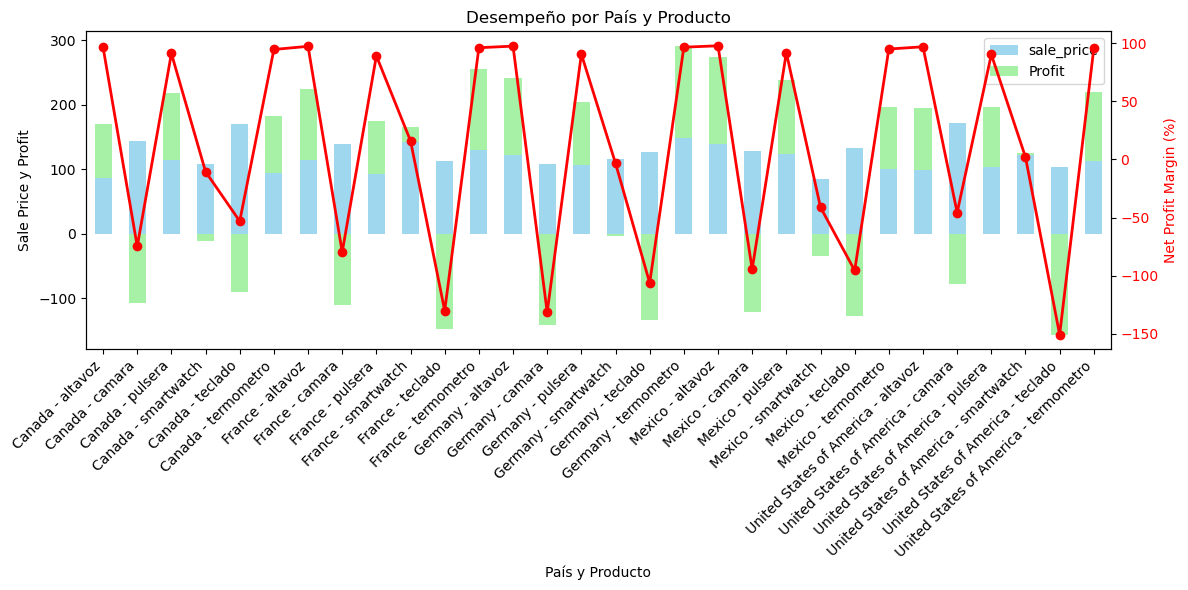

In [72]:
# Asegurándonos de que 'Profit' esté en grouped_data
grouped_data['Profit'] = grouped_data['sale_price'] - grouped_data['manufacturing_price']

# Asegurarnos de que 'Net Profit Margin (%)' esté en grouped_data
grouped_data['Net Profit Margin (%)'] = (grouped_data['Profit'] / grouped_data['sale_price']) * 100



# Crear el gráfico de barras con dos ejes Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar 'Sale Price' y 'Profit' en el primer eje Y
grouped_data[['sale_price', 'Profit']].plot(
    kind='bar', 
    stacked=True, 
    ax=ax1, 
    color=['skyblue', 'lightgreen'],
    alpha=0.8
)
ax1.set_xlabel('País y Producto')
ax1.set_ylabel('Sale Price y Profit', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Crear el segundo eje Y para el Net Profit Margin (%) y graficarlo
ax2 = ax1.twinx()
grouped_data['Net Profit Margin (%)'].plot(
    kind='line', 
    ax=ax2, 
    color='red', 
    marker='o', 
    linewidth=2, 
    label='Net Profit Margin'
)
ax2.set_ylabel('Net Profit Margin (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Agregar título y ajustar etiquetas del eje X
plt.title('Desempeño por País y Producto')
ax1.set_xticklabels(grouped_data['country'] + ' - ' + grouped_data['product'], rotation=45, ha='right')

# Ajustar diseño
fig.tight_layout()

# Mostrar el gráfico
plt.show()


#### Análisis comparativo por país

Se identificará el desempeño en términos de ventas, beneficios y márgenes en cada país.

In [73]:
comparacion_df = datos_df.groupby('country').agg({
    'sales': 'sum',
    'profit': 'sum',
    'cogs': 'sum',
    'sale_price': 'mean',
    'manufacturing_price': 'mean',
    'discounts': 'sum'   
}).rename(columns = {
    'sales': 'Total Sales',
    'profit': 'Total Profit',   
    'cogs': 'Total COGS',   
    'sale_price': 'Average Sale Price',
    'manufacturing_price': 'Average Manufacturing Price',
    'discounts': 'Total Discounts'
})

El beneficio neto se refiere a las ganancias después de restar los costos de producción, entre otros. Con ello se podrá obtener una visión clara de qué tan rentable es una empresa en relación con sus ingresos:

        Margen de Beneficio Neto = ((Beneficio Total)/(Ventas Totales)) x 100

In [74]:
comparacion_df['Net Profit Margin (%)'] = ((comparacion_df['Total Profit'] / comparacion_df['Total Sales']) * 100).round(2) 
comparacion_df['Net Profit Margin (%)'] = comparacion_df['Net Profit Margin (%)'] / 100

print(comparacion_df)

                          Total Sales  Total Profit  Total COGS  \
country                                                           
Canada                    24887654.89    3858206.39  21358426.0   
France                    24354172.29    4032488.29  20573151.5   
Germany                   23505340.82    3961381.32  19824952.0   
Mexico                    20949352.11    3198923.11  18041829.0   
United States of America  25029830.18    3397345.68  22034289.5   

                          Average Sale Price  Average Manufacturing Price  \
country                                                                     
Canada                            118.428571                    93.928571   
France                            118.428571                    95.528571   
Germany                           118.428571                    95.500000   
Mexico                            118.428571                    95.671429   
United States of America          118.428571                   101.7

Visualización del análisis comparativo

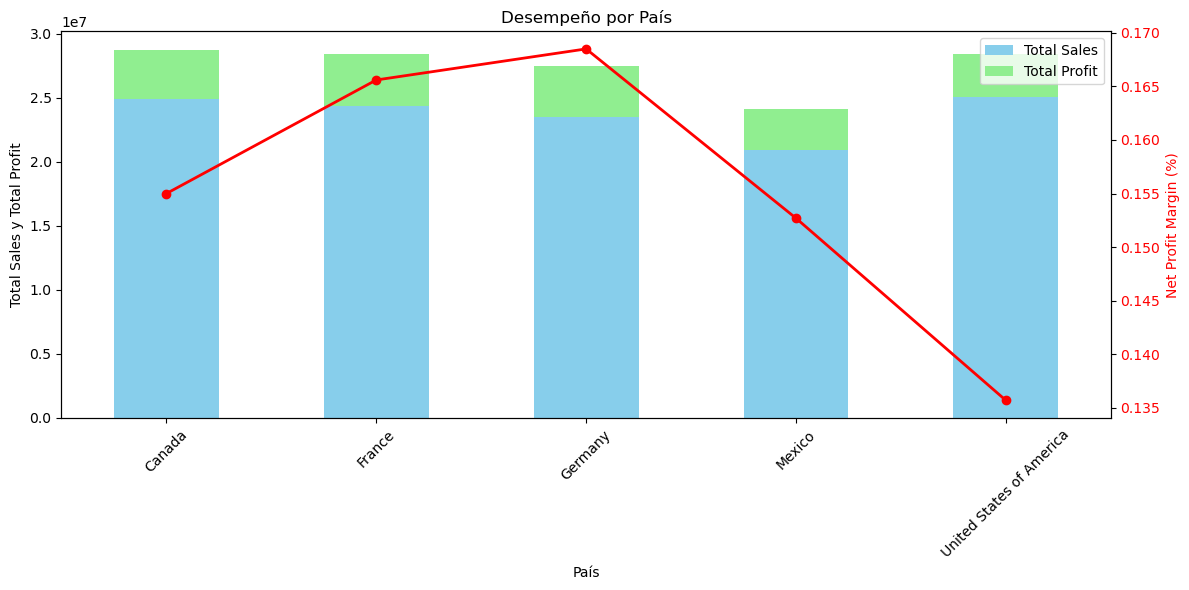

In [75]:
# Crear el gráfico de barras con dos ejes Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar Total Sales y Total Profit en el primer eje Y
comparacion_df[['Total Sales', 'Total Profit']].plot(kind='bar', stacked=True, ax=ax1, color=['skyblue', 'lightgreen'])
ax1.set_xlabel('País')
ax1.set_ylabel('Total Sales y Total Profit', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Crear el segundo eje Y para el Net Profit Margin (%) y graficarlo
ax2 = ax1.twinx()
comparacion_df['Net Profit Margin (%)'].plot(kind='line', ax=ax2, color='red', marker='o', linewidth=2, label='Net Profit Margin')
ax2.set_ylabel('Net Profit Margin (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Agregar título y leyenda
plt.title('Desempeño por País')
ax1.set_xticklabels(comparacion_df.index, rotation=45)
fig.tight_layout()

# Mostrar el gráfico
plt.show()

Puede observar que EEUU tiene las ventas totales más altas con un valor de 25,029,830.18$ mientras que méxico tiene las más bajas.

Respecto al beneficio total, es decir, las ganancias después de descontar los costos de producción (COGS) de las ventas, Francia y Alemania tienen el mayor beneficio total con 4,032,488.29 y 3,961,381.32 respectivamente. A destacar, que EEUU tiene un beneficio sorprendentemente bajo, con 3397345.68$, junto con México. Esto podría indicar que la eficiencia en mucho menor.

El COGS, costo asociado con la producción de los productos vendidos, alcanza un valor de 22,034,289.5 en EEUU, costo bastante elevado. Alemania y Francia presentan los COGS más bajos, que podría indicar un controlmás eficiente de los costos de producción. 

Respecto al Average Manufacturing Price (Precio Promedio de Fabricación), EEUU tiene el promedio más alto seguido por Canada.

EEUU tiene además, los descuentos totales más altos, es decir, todo indica que utiliza una estrategia de descuentos mucho más agresiva para estimular las ventas.

#### Análisis de márgenes de beneficio por producto


El objetivo será destacar oportunidades

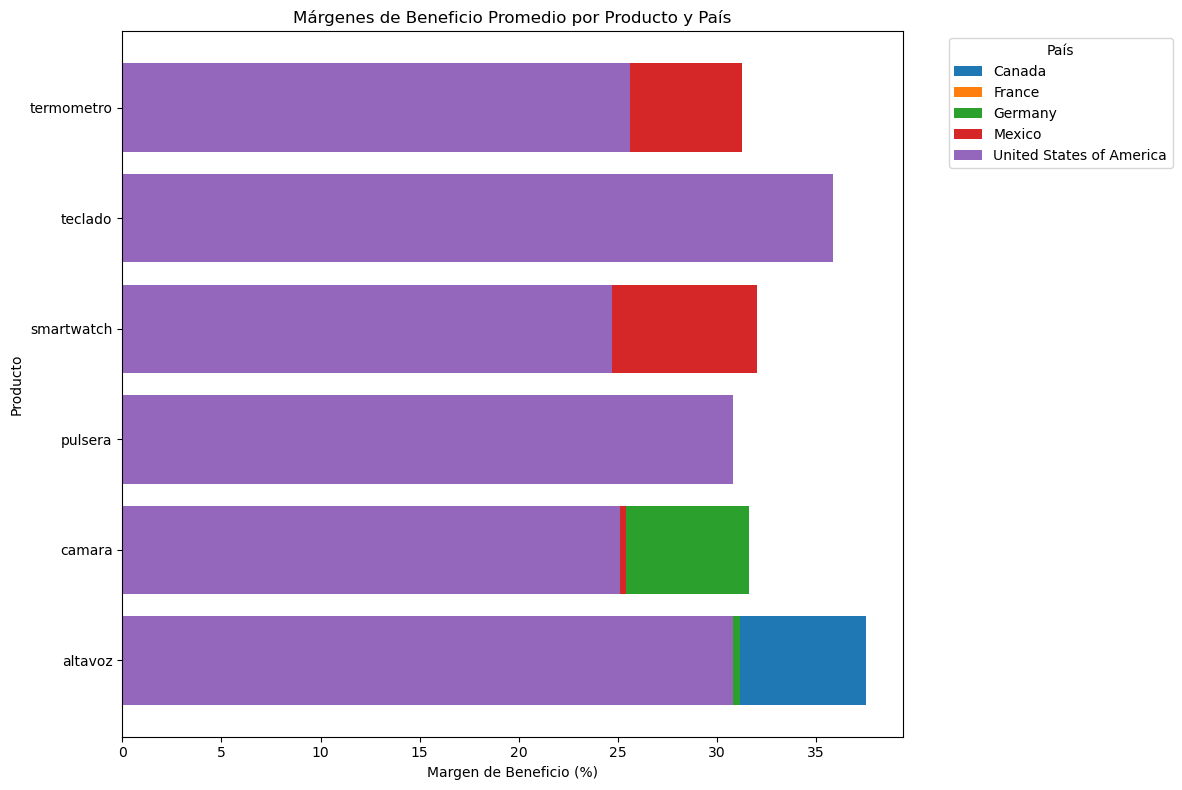

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que `datos_df` ya está definido con las columnas necesarias: 'country', 'product', 'profit', 'sales'

# Cálculo de margen de beneficio
datos_df['Profit Margin (%)'] = ((datos_df['profit'] / datos_df['sales']) * 100).round(2)

# Promedio de margen de beneficio por producto y país
avg_profit_margin = datos_df.groupby(['country', 'product'])['Profit Margin (%)'].mean().reset_index()

# Visualización
plt.figure(figsize=(12, 8))

for country in avg_profit_margin['country'].unique():
    country_data = avg_profit_margin[avg_profit_margin['country'] == country]
    plt.barh(country_data['product'], country_data['Profit Margin (%)'], label=country)

plt.title('Márgenes de Beneficio Promedio por Producto y País')
plt.xlabel('Margen de Beneficio (%)')
plt.ylabel('Producto')
plt.legend(title="País", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Análisis de descuentos

Analizar los niveles promedio de descuento por producto y evaluar su impacto en las ventas.


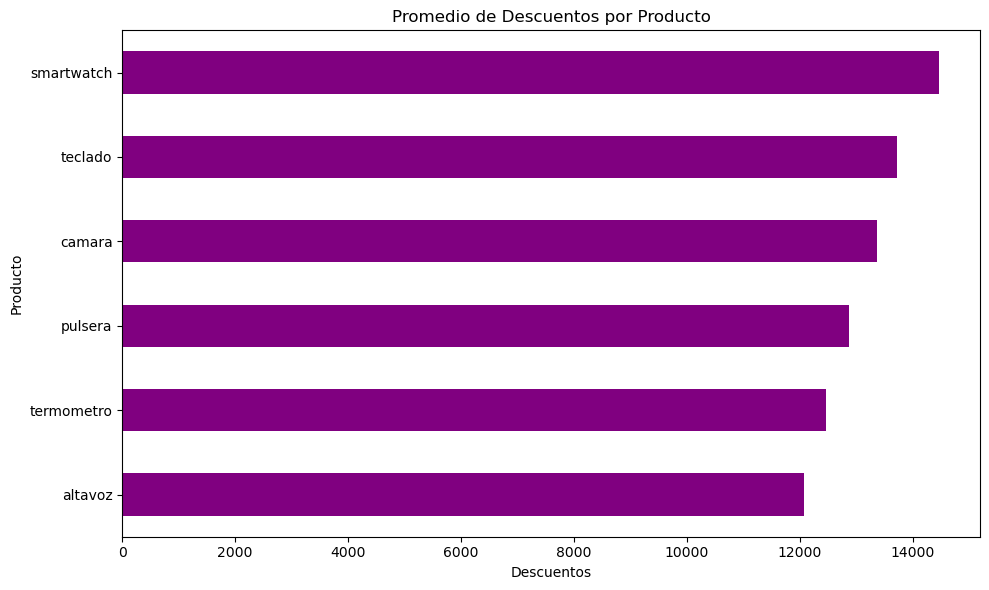

In [77]:

avg_discounts = datos_df.groupby('product')['discounts'].mean()

# Visualización
plt.figure(figsize=(10, 6))
avg_discounts.sort_values().plot(kind='barh', color='purple')
plt.title('Promedio de Descuentos por Producto')
plt.xlabel('Descuentos')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()



#### Análisis temporal de ventas

A continuación se examinarán tendencias estacionales o anuales en las ventas

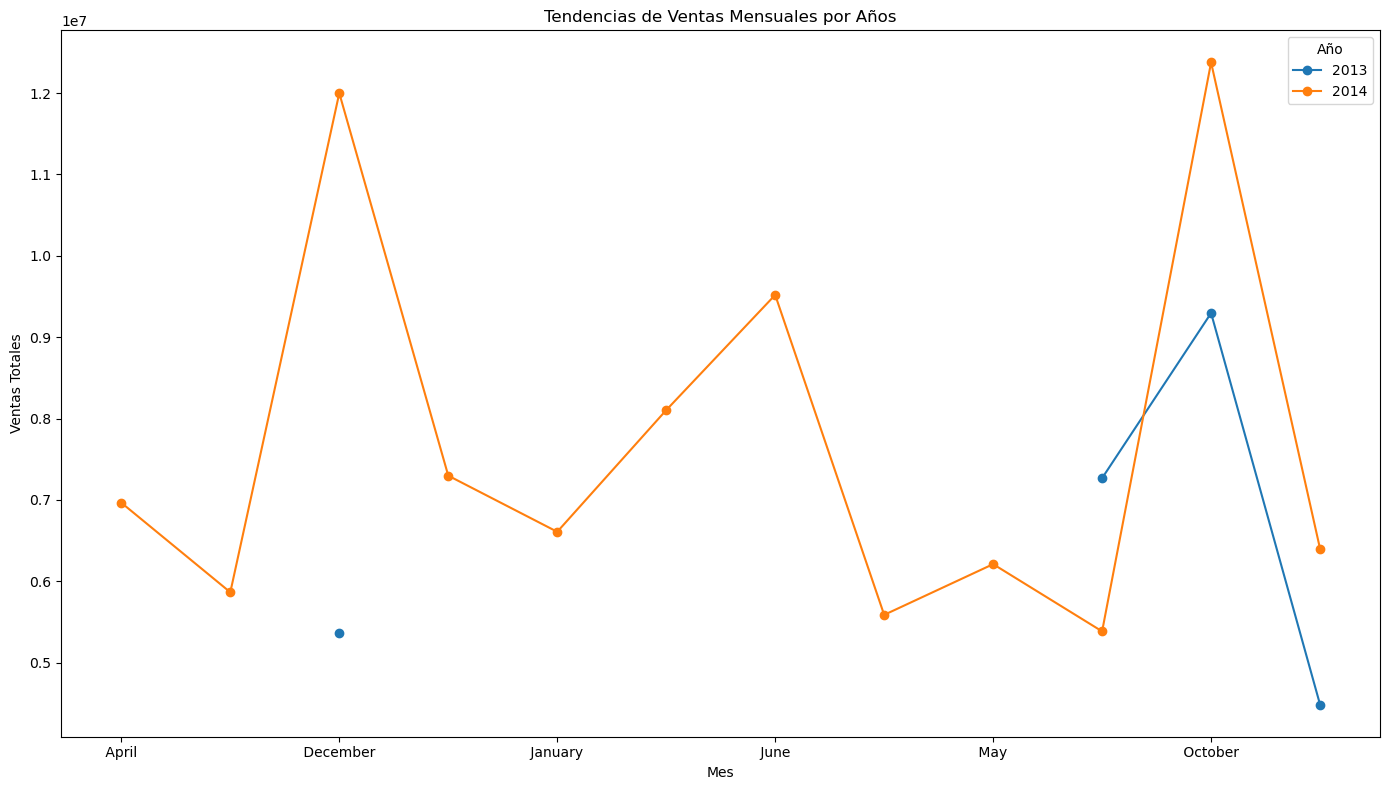

In [78]:
monthy_sales = datos_df.groupby(['year', 'month_name'])['sales'].sum().unstack()

#visualización
monthy_sales.T.plot(kind = 'line', figsize=(14, 8), marker='o')
plt.title('Tendencias de Ventas Mensuales por Años')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.legend(title='Año', loc='upper right')
plt.tight_layout()
plt.show()


Una vez realizada la limpieza de datos y el análisis exploratorio inicial, se ha decidido enfocar este proyecto en predecir y mejorar el Net Profit Margin (%) por país. Identificaremos qué factores, como descuentos o costos de producción, afectan más al beneficio neto y se verán posibles ajustes para maximizarlos.

## Mejorar Profit de cada País

Para conseguir el objetivo de nuestro proyecto, se realizarán 2 estudios distintos:

1. Estudiar mediante una matriz de correlación las variables más correlacionadas entre sí para luego, aplicando distintos modelos de Regresión, poder llegar a la conclusión de cuál es la función que mejor describe el comportamiento de las variables para poder establecer una política que ayude a cada país a aumentar el Beneficio Neto.

2. Se usará un algoritmo de eliminación recursiva que nos permitirá hacer una nueva selección de las variables más importantes para de nuevo volver a aplicar los modelos de regresión y ver en qué caso se obtiene un mejor rendimiento.

En los modelos de regresión se procederá a estandarizar las variables; si estas tienen diferentes escalas, los coeficientes de la regresión pueden ser difíciles de comparar. Estandarizar asegura que todos los coeficientes estén en la misma escala.

Relación entre descuentos, costos y beneficios:

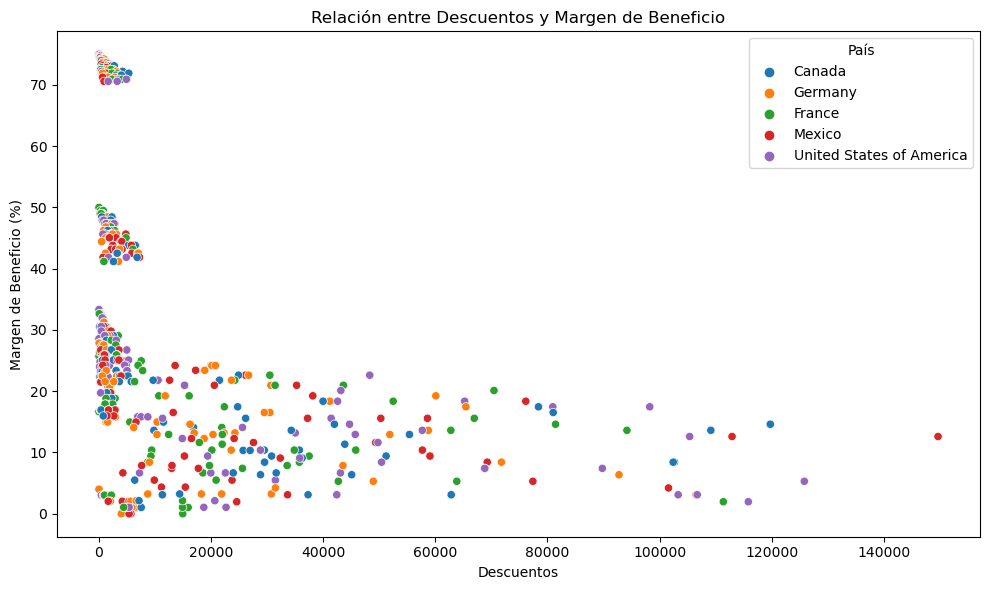

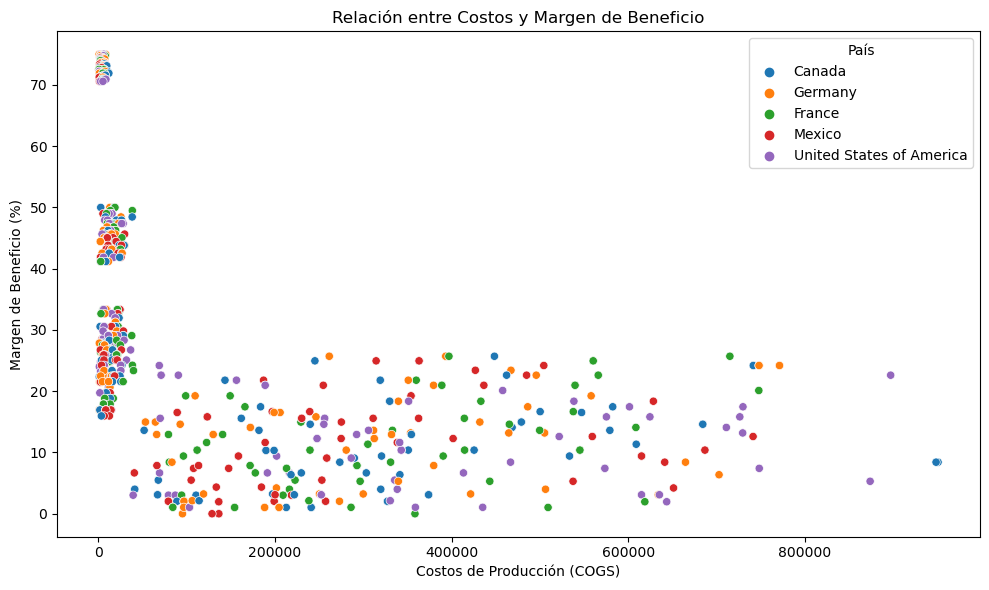

In [79]:
# Relación entre descuentos y margen de beneficio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datos_df, x='discounts', y='Profit Margin (%)', hue='country')
plt.title('Relación entre Descuentos y Margen de Beneficio')
plt.xlabel('Descuentos')
plt.ylabel('Margen de Beneficio (%)')
plt.legend(title='País')
plt.tight_layout()
plt.show()

# Relación entre costos y margen de beneficio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datos_df, x='cogs', y='Profit Margin (%)', hue='country')
plt.title('Relación entre Costos y Margen de Beneficio')
plt.xlabel('Costos de Producción (COGS)')
plt.ylabel('Margen de Beneficio (%)')
plt.legend(title='País')
plt.tight_layout()
plt.show()

Para mejorar el Beneficio Neto, el primer paso ha de ser estudiar qué variables se relacionan más con la variable objetivo 'Net Profit'. Esta variable se calcula de la siguiente manera:

* **Gross Sales** nos proporciona el valor total de las ventas antes de descuentos.

        Gross Sales = Units Sold * Sale Price

* **COGS** proprociona el costo total de los bienes vendidos
         
        COGS = Units Sold * Manufacturing Price

* **Profit** se calcula directamente como:
  
         Profit = Sales - COGS


#### One Hot Encoding

Para ciertos algoritmos y concretamente los que se usarán en este análisis es necesario que las columnas pasen a ser numéricas. Para ello, se usará __One Hot Enconding__. Las columnas '_segment_', '_country_', '_product_', '_discount_band_' y '_month_name_' pasarán a tomar valores 0 o 1. El procedimiento es el siguiente:

Los valores que toma '_segment_' son los siguientes: '_Government_', '_Midmarket_', '_Channel Partners_',' _Enterprise_', '_Small Business_'. 
Aplicando __One Hot Enconding__ cada valor de dicha columna _segment_ pasará a ser una nueva columna. La columna correspondiente tomará valor 1 si el '_segment_' de dicha fila tomaba ese valor y 0 si no lo tomaba.  


In [80]:
# imprimir columnas categóricas:
categorical_columns = datos_df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['segment', 'country', 'product', 'discount_band', 'month_name'], dtype='object')


In [81]:
# Lista de columnas categóricas
columnas_categoricas = ['segment', 'country', 'product', 'discount_band', 'month_name']

# Aplicar One-Hot Encoding
datos_encoded_df = pd.get_dummies(datos_df, columns=columnas_categoricas, drop_first=True)

# Mostrar las primeras filas del DataFrame codificado
print(datos_encoded_df.head())

# Información del DataFrame transformado
print("Shape del DataFrame codificado:", datos_encoded_df.shape)
print(datos_encoded_df.columns)

   units_sold  manufacturing_price  sale_price  gross_sales  discounts  \
0      1618.5                  3.0        20.0      32370.0        0.0   
1      1321.0                  3.0        20.0      26420.0        0.0   
2      2178.0                  3.0        15.0      32670.0        0.0   
3       888.0                  3.0        15.0      13320.0        0.0   
4      2470.0                  3.0        15.0      37050.0        0.0   

     sales     cogs   profit       date  month_number  ...  \
0  32370.0  16185.0  16185.0 2014-01-01             1  ...   
1  26420.0  13210.0  13210.0 2014-01-01             1  ...   
2  32670.0  21780.0  10890.0 2014-06-01             6  ...   
3  13320.0   8880.0   4440.0 2014-06-01             6  ...   
4  37050.0  24700.0  12350.0 2014-06-01             6  ...   

   month_name_ December   month_name_ February   month_name_ January   \
0                  False                  False                  True   
1                  False            

Al haber aplicado One Hot, vamos a asegurarnos de quitar espacios de las columnas:

In [82]:
# Aplicar One-Hot Encoding
columnas_categoricas = ['segment', 'country', 'product', 'discount_band', 'month_name']
datos_encoded_df = pd.get_dummies(datos_df, columns=columnas_categoricas, drop_first=True)

# Eliminar espacios en los nombres de las columnas
datos_encoded_df.columns = datos_encoded_df.columns.str.replace(' ', '_')

# Verificar el resultado
print(datos_encoded_df.columns)


Index(['units_sold', 'manufacturing_price', 'sale_price', 'gross_sales',
       'discounts', 'sales', 'cogs', 'profit', 'date', 'month_number', 'year',
       'Profit_Margin_(%)', 'segment_Enterprise', 'segment_Government',
       'segment_Midmarket', 'segment_Small_Business', 'country_France',
       'country_Germany', 'country_Mexico', 'country_United_States_of_America',
       'product_camara', 'product_pulsera', 'product_smartwatch',
       'product_teclado', 'product_termometro', 'discount_band__Low_',
       'discount_band__Medium_', 'discount_band__None_', 'month_name__August_',
       'month_name__December_', 'month_name__February_',
       'month_name__January_', 'month_name__July_', 'month_name__June_',
       'month_name__March_', 'month_name__May_', 'month_name__November_',
       'month_name__October_', 'month_name__September_'],
      dtype='object')


### 1. ESTUDIO CON MATRIZ DE CORRELACIÓN

#### 1.1 MATRIZ DE CORRELACIÓN POR PAÍSES

In [83]:
import pandas as pd

# Función para crear matriz de correlación para cada país
def create_correlation_matrix_by_country(country_data):
    correlation_matrix = country_data.corr()
    target_corr = correlation_matrix['profit'].drop(labels=['profit'], errors='ignore')
    sorted_corr = target_corr.sort_values(ascending=False)
    return sorted_corr

# Filtrar los países
country_columns = [col for col in datos_encoded_df.columns if col.startswith('country_')]

# Crear un diccionario para almacenar las matrices de correlación
country_correlations = {}

for country_col in country_columns:
    country_name = country_col.replace('country_', '').replace('_', ' ')
    country_data = datos_encoded_df[datos_encoded_df[country_col] == 1]
    country_correlations[country_name] = create_correlation_matrix_by_country(country_data)

# Visualizar las correlaciones por país
for country_name, corr in country_correlations.items():
    print(f"\nMatriz de correlación para {country_name}:")
    print(corr)



Matriz de correlación para France:
sales                               0.866372
gross_sales                         0.849551
cogs                                0.797951
sale_price                          0.689154
discounts                           0.408366
segment_Government                  0.313635
discount_band__None_                0.196465
units_sold                          0.184440
manufacturing_price                 0.112370
month_name__February_               0.088163
product_teclado                     0.087108
month_name__September_              0.080274
month_name__October_                0.077395
segment_Small_Business              0.069878
discount_band__Low_                 0.064301
year                                0.044637
product_smartwatch                  0.040943
month_name__January_                0.040494
date                                0.040372
product_camara                      0.035924
discount_band__Medium_              0.025152
month_number       

#### 1.1 MATRIZ DE CORRELACIÓN GENERAL

In [84]:
# Generar la matriz de correlación
correlation_matrix = datos_encoded_df.corr()

# Mostrar la matriz de correlación
import pandas as pd
import numpy as np

# Establecer la diagonal en NaN para excluir las correlaciones de las variables consigo mismas
np.fill_diagonal(correlation_matrix.values, np.nan)

# Ordenar la matriz de correlación por valores absolutos (para ver las más significativas)
correlation_matrix_sorted = correlation_matrix.stack().sort_values(ascending=False)

# Filtrar solo las correlaciones mayores a 0.5 (o el umbral que necesites)
correlation_matrix_sorted = correlation_matrix_sorted[correlation_matrix_sorted > 0.5]

# Filtrar solo las correlaciones menores a 0.5 (o el umbral que necesites)
##correlation_matrix_sorted = correlation_matrix_sorted[correlation_matrix_sorted < 0.5]

# Mostrar solo las correlaciones que no son 1 (diagonal)
correlation_non_1 = correlation_matrix_sorted[correlation_matrix_sorted != 1]

# Mostrar las correlaciones no iguales a 1
pd.set_option('display.max_rows', 100)  # Establecer un límite para ver todas las filas
print(correlation_non_1)


sales                   gross_sales               0.998174
gross_sales             sales                     0.998174
cogs                    gross_sales               0.994519
gross_sales             cogs                      0.994519
cogs                    sales                     0.992244
sales                   cogs                      0.992244
                        profit                    0.847699
profit                  sales                     0.847699
                        gross_sales               0.828931
gross_sales             profit                    0.828931
                        sale_price                0.808250
sale_price              gross_sales               0.808250
sales                   sale_price                0.805878
sale_price              sales                     0.805878
cogs                    sale_price                0.799335
sale_price              cogs                      0.799335
cogs                    discounts                 0.7829

#### 1.2 REGRESIÓN LINEAL MÚLTIPLE

El análisis de regresión lineal se utiliza para predecir el valor de una variable basándose en el valor de otra variable. La variable que desea predecir se denomina variable dependiente. La variable que está utilizando para predecir el valor de la otra variable se denomina variable independiente.


En este caso se dividirán los datos en un 80% para train y 20% para test

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  # Importar StandardScaler

# Asegúrate de que 'datos_encoded_df' ya esté preparado con las variables requeridas
# Seleccionar las mejores variables predictoras según la matriz de correlación
selected_features = ['gross_sales', 'sales', 'cogs', 'sale_price']

# Crear el conjunto de datos con las variables seleccionadas
X = datos_encoded_df[selected_features]

# Variable dependiente: 'Net Profit'
y = datos_encoded_df['profit']

# **Aplicar la estandarización**
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Estandarizar las variables predictoras

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación

# Mostrar el rendimiento del modelo
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes de regresión (peso de cada variable en el beneficio neto)
coef_df = pd.DataFrame(model.coef_, selected_features, columns=['Coeficientes'])
print("\nCoeficientes de regresión:")
print(coef_df)

# Mostrar las variables más significativas (las que tienen los coeficientes más grandes en valor absoluto)
coef_df['Abs_Coeff'] = coef_df['Coeficientes'].abs()
coef_df = coef_df.sort_values(by='Abs_Coeff', ascending=False)

print("\nVariables más significativas:")
print(coef_df)


Error cuadrático medio (MSE): 77493295.7114436
Coeficiente de determinación (R^2): 0.9645128203653324

Coeficientes de regresión:
              Coeficientes
gross_sales  -16005.489067
sales        211961.372531
cogs        -161527.537315
sale_price     -867.804516

Variables más significativas:
              Coeficientes      Abs_Coeff
sales        211961.372531  211961.372531
cogs        -161527.537315  161527.537315
gross_sales  -16005.489067   16005.489067
sale_price     -867.804516     867.804516


#### 1.3 REGRESIÓN LINEAL MÚLTIPLE CON VALIDACION CRUZADA

En el siguiente caso, aplicaremos una regresión lineal, esta vez con validación cruzada. Esta una técnica permite evaluar modelos de ML mediante el entrenamiento de varios modelos de ML en subconjuntos de los datos de entrada disponibles y evaluarlos con el subconjunto complementario de los datos.

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler

# Seleccionar las mejores variables predictoras según la matriz de correlación
selected_features = ['gross_sales', 'sales', 'cogs', 'sale_price']

# Crear el conjunto de datos con las variables seleccionadas
X = datos_encoded_df[selected_features]

# Variable dependiente: 'Net Profit'
y = datos_encoded_df['profit']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Configurar validación cruzada con 10 particiones
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Definir el scoring para validación cruzada (usaremos R^2 y MSE)
r2_scorer = make_scorer(r2_score)
mse_scorer = make_scorer(mean_squared_error)

# Realizar validación cruzada para R^2
r2_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring=r2_scorer)

# Realizar validación cruzada para MSE (convertir a valores positivos)
mse_scores = -cross_val_score(model, X_scaled, y, cv=kf, scoring=mse_scorer)

# Ajustar el modelo en todo el conjunto de datos para obtener coeficientes
model.fit(X_scaled, y)

# Mostrar resultados de validación cruzada
print("Resultados de validación cruzada:")
print(f"R^2 por partición:\n{r2_scores}")
print(f"Promedio de R^2: {np.mean(r2_scores):.4f}")
print(f"Desviación estándar de R^2: {np.std(r2_scores):.4f}\n")

print(f"MSE por partición:\n{mse_scores}")
print(f"Promedio de MSE: {np.mean(mse_scores):.4f}")
print(f"Desviación estándar de MSE: {np.std(mse_scores):.4f}\n")

# Mostrar los coeficientes de regresión (peso de cada variable en el beneficio neto)
coef_df = pd.DataFrame(model.coef_, selected_features, columns=['Coeficientes'])
print("Coeficientes de regresión:")
print(coef_df)

# Mostrar las variables más significativas (las que tienen los coeficientes más grandes en valor absoluto)
coef_df['Abs_Coeff'] = coef_df['Coeficientes'].abs()
coef_df = coef_df.sort_values(by='Abs_Coeff', ascending=False)

print("\nVariables más significativas:")
print(coef_df)


Resultados de validación cruzada:
R^2 por partición:
[0.95795149 0.97013035 0.98542184 0.95620825 0.95308794 0.96371218
 0.92223024 0.95584607 0.96132252 0.96315953]
Promedio de R^2: 0.9589
Desviación estándar de R^2: 0.0151

MSE por partición:
[-8.71201377e+07 -6.81765837e+07 -3.64623282e+07 -8.84154105e+07
 -6.15636975e+07 -7.86945973e+07 -1.04655812e+08 -2.71729550e+07
 -4.24416229e+07 -5.25149963e+07]
Promedio de MSE: -64721814.1386
Desviación estándar de MSE: 23935062.3785

Coeficientes de regresión:
              Coeficientes
gross_sales  -14306.484541
sales        209652.344162
cogs        -160676.315058
sale_price    -1054.191331

Variables más significativas:
              Coeficientes      Abs_Coeff
sales        209652.344162  209652.344162
cogs        -160676.315058  160676.315058
gross_sales  -14306.484541   14306.484541
sale_price    -1054.191331    1054.191331


#### 1.4 REGRESION POLINOMIAL 
Una regresión polinomial podría ser adecuada cuando la relación entre las variables independientes (predictoras) y la variable dependiente (respuesta) no es lineal. En este caso, debido a los resultados de la regresión lineal (alto 𝑅2 pero valores extremos de MSE), podría haber una relación no lineal entre las variables predictoras y Net Profit.

In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# Selección de variables predictoras y dependiente
selected_features = ['gross_sales', 'sales', 'cogs', 'sale_price']
X = datos_encoded_df[selected_features]
y = datos_encoded_df['profit']

# Escalamos las variables y transformamos con polinomios
degree = 2  # Grado inicial del polinomio; ajustable según los resultados
poly_model = make_pipeline(
    PolynomialFeatures(degree),  # Crea características polinómicas
    StandardScaler(),            # Estandariza las características
    LinearRegression()           # Modelo de regresión lineal
)

# Configuramos validación cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)
r2_scorer = make_scorer(r2_score)
mse_scorer = make_scorer(mean_squared_error)

# Validación cruzada para R^2
r2_scores = cross_val_score(poly_model, X, y, cv=kf, scoring=r2_scorer)

# Validación cruzada para MSE
mse_scores = -cross_val_score(poly_model, X, y, cv=kf, scoring=mse_scorer)

# Ajustamos el modelo en todos los datos para analizar coeficientes
poly_model.fit(X, y)

# Mostrar resultados
print("Resultados de validación cruzada:")
print(f"R^2 por partición:\n{r2_scores}")
print(f"Promedio de R^2: {np.mean(r2_scores):.4f}")
print(f"Desviación estándar de R^2: {np.std(r2_scores):.4f}\n")

print(f"MSE por partición:\n{mse_scores}")
print(f"Promedio de MSE: {np.mean(mse_scores):.4f}")
print(f"Desviación estándar de MSE: {np.std(mse_scores):.4f}\n")

# Extraemos el modelo final y mostramos los coeficientes
final_model = poly_model.named_steps['linearregression']
poly_features = poly_model.named_steps['polynomialfeatures']
feature_names = poly_features.get_feature_names_out(selected_features)

coef_df = pd.DataFrame(final_model.coef_, feature_names, columns=['Coeficientes'])
print("Coeficientes del modelo polinomial:")
print(coef_df.sort_values(by='Coeficientes', key=abs, ascending=False).head(10))


Resultados de validación cruzada:
R^2 por partición:
[0.99538229 0.99573623 0.99565595 0.99380936 0.99074807 0.99540217
 0.98938519 0.98425823 0.99169723 0.99481677]
Promedio de R^2: 0.9927
Desviación estándar de R^2: 0.0035

MSE por partición:
[ -9567412.79349806  -9731938.78768564 -10865164.85431327
 -12498886.20337753 -12141510.20116656  -9970948.61163969
 -14284495.97860584  -9687706.13660735  -9110807.64578149
  -7388535.25957146]
Promedio de MSE: -10524740.6472
Desviación estándar de MSE: 1874837.5350

Coeficientes del modelo polinomial:
                        Coeficientes
gross_sales cogs       -1.012024e+06
gross_sales^2           8.615192e+05
gross_sales sales      -7.170137e+05
sales cogs              6.236339e+05
sales sale_price        6.172277e+05
gross_sales             5.757847e+05
gross_sales sale_price -5.554331e+05
sales                  -3.713217e+05
cogs^2                  1.952118e+05
cogs                   -1.558645e+05


#### 1.5 REGRESIÓN CON SOPORTE VECTORIAL

In [88]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Cargar datos (asegúrate de que 'datos_encoded_df' esté definido previamente)
datos = datos_encoded_df.copy()

# Selección de características relevantes
# Basado en correlaciones fuertes con 'Net Profit'
features = ['gross_sales', 'sales', 'cogs', 'sale_price']
X = datos[features]
y = datos['profit']

# Verificar y filtrar columnas numéricas
X_numeric = X.select_dtypes(include=[np.number])

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir el modelo SVR
svr_model = SVR()

# Configuración de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],       # Penalización de regularización
    'epsilon': [0.001, 0.01, 0.1, 0.5, 1],  # Margen de tolerancia al error
    'kernel': ['rbf', 'linear', 'poly'],    # Tipos de kernel
    'degree': [2, 3]  # Solo para kernel 'poly'
}

# Optimizar hiperparámetros usando GridSearchCV
grid_search = GridSearchCV(
    estimator=svr_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

# Obtener el mejor modelo
best_svr_model = grid_search.best_estimator_

# Realizar predicciones sobre el conjunto de prueba
y_pred = best_svr_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nError cuadrático medio (MSE): {mse:.4f}")
print(f"Coeficiente de determinación (R^2): {r2:.4f}")

# Validación cruzada
cv_scores_mse = cross_val_score(best_svr_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(best_svr_model, X_scaled, y, cv=5, scoring='r2')

# Calcular promedios de validación cruzada
mean_cv_mse = np.mean(cv_scores_mse)
mean_cv_r2 = np.mean(cv_scores_r2)

print(f"\nPromedio MSE en la validación cruzada (SVR): {mean_cv_mse:.4f}")
print(f"Promedio R^2 en la validación cruzada (SVR): {mean_cv_r2:.4f}")


Mejores parámetros encontrados: {'C': 1000, 'degree': 3, 'epsilon': 0.001, 'kernel': 'poly'}

Error cuadrático medio (MSE): 197239797.9696
Coeficiente de determinación (R^2): 0.9097

Promedio MSE en la validación cruzada (SVR): -208042740.9034
Promedio R^2 en la validación cruzada (SVR): 0.7841


### 2. ESTUDIO ANTERIOR DIVIDIDO POR PAISES 

#### Ajustar la regresión para cada país 

* Para cada pais se seleccionarán las variables que mas se correlacionen con nuestra variable objetivo _'Net Profit'_: 
        'France': ['gross_sales', 'sales', 'cogs', 'Profit', 'sale_price', 'profit', 'discounts'],
        'Germany': ['gross_sales', 'sales', 'cogs', 'sale_price', 'profit', 'Profit', 'discounts'],
        'Mexico': ['gross_sales', 'sales', 'cogs', 'discounts', 'Profit', 'sale_price', 'profit'],
        'United States of America': ['sales', 'profit', 'gross_sales', 'cogs', 'Profit', 'sale_price', 'discounts']

* Se normalizarán las variables usando __StandarScaler__

* Se entrenarán y evaluarán varios modelos de regresión:

  * Regresión Lineal: Ajusta una línea recta a los datos. El objetivo en este caso es predecir el valor de Net Profit a partir de las variables independientes.

     La Regresión lineal presenta ciertos posibles problemas como la multicolinealidad (variables independientes altamente correlacionadas) u Overfitting (el modelo puede ajustarse demasiado a los datos de entrenamiento). 

     Tando Ridge como Lasso son variantes de la regresión lineal que intentan solucionar estos problemas añadiendo una penalización o regularización al modelo.

  * Regresión Ridge: Agrega una penalización a la suma de los cuadrados de los coeficientes de las variables independientes para evitar el sobreajuste. 
  * Regresión Lasso: Similar a la anterior pero penaliza la suma de los valores absolutos de los coeficientes. Esto resulta en una selección automática de variables ya que puede incluso hacerlas 0.
  * Regresión Polinomial con Ridge: Regresión de segundo grado combinada con regularización para manejar la no linealidad de los datos

* Los modelos se evlúan utilizando:
  * MSE: Magnitud de errores entre predicciones y valores reales. Más bajo mejor.
  * R2: Proporción de variabilidad en Net Profit que es explicada por las variables independientes. Un valor cercano a 1 siginifica que el modelo se ajusta bien.
  * Validación cruzada: Se utiliza para la regresión lineal, proporcionando una medida más robusta del desempeño del modelo.

In [89]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Función para calcular MSE y R^2
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Función para manejar la regresión polinomial con regularización Ridge
def analyze_country_with_selected_features(country_data, country_name, selected_features):
    print(f"*** Análisis para {country_name} ***")
    print(f"Variables seleccionadas como independientes para {country_name}: {selected_features}")

    if len(selected_features) == 0:
        print(f"No se seleccionaron variables para {country_name}.")
        return

    # Dividir datos en variables independientes (X) y dependiente (y)
    X = country_data[selected_features]
    y = country_data['profit']
    
    # Escalar las características (estandarización)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Dividir en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # 1. Regresión Lineal con Validación Cruzada
    lin_reg = LinearRegression()
    cv_scores = cross_val_score(lin_reg, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    mean_cv_mse = -np.mean(cv_scores)
    mean_cv_r2 = np.mean(cross_val_score(lin_reg, X_scaled, y, cv=5, scoring='r2'))
    print(f"Regresión Lineal (CV) - Promedio MSE: {mean_cv_mse:.4f}, Promedio R^2: {mean_cv_r2:.4f}")

    # 2. Regresión Ridge con Validación Cruzada y Búsqueda de Hiperparámetros
    ridge_reg = Ridge()
    ridge_param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
    ridge_search = GridSearchCV(ridge_reg, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
    ridge_search.fit(X_train, y_train)
    mse_ridge, r2_ridge = evaluate_model(ridge_search.best_estimator_, X_test, y_test)
    print(f"Regresión Ridge (con GridSearch y CV) - MSE: {mse_ridge:.4f}, R^2: {r2_ridge:.4f}, Alpha: {ridge_search.best_params_['alpha']}")

    # 3. Regresión Lasso con Validación Cruzada y Búsqueda de Hiperparámetros (aumentando max_iter)
    lasso_reg = Lasso(max_iter=10000)  # Aumentar iteraciones para evitar advertencias de convergencia
    lasso_param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
    lasso_search = GridSearchCV(lasso_reg, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
    lasso_search.fit(X_train, y_train)
    mse_lasso, r2_lasso = evaluate_model(lasso_search.best_estimator_, X_test, y_test)
    print(f"Regresión Lasso (con GridSearch y CV) - MSE: {mse_lasso:.4f}, R^2: {r2_lasso:.4f}, Alpha: {lasso_search.best_params_['alpha']}")

    # 4. Regresión Polinomial con Ridge con Validación Cruzada
    poly = PolynomialFeatures(degree=3)  # Aumentar grado polinómico para mayor flexibilidad
    X_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_ridge_reg = Ridge(alpha=1.0)
    cv_scores_poly = cross_val_score(poly_ridge_reg, X_poly, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cv_mse_poly = -np.mean(cv_scores_poly)
    mean_cv_r2_poly = np.mean(cross_val_score(poly_ridge_reg, X_poly, y_train, cv=5, scoring='r2'))
    print(f"Regresión Polinomial con Ridge (CV) - Promedio MSE: {mean_cv_mse_poly:.4f}, Promedio R^2: {mean_cv_r2_poly:.4f}")

# Función principal para analizar todos los países
def analyze_all_countries(datos_encoded_df, countries):
    selected_variables = {
        'France': ['sales', 'gross_sales', 'cogs'],
        'Germany': ['sales', 'gross_sales', 'cogs'],
        'Mexico': ['sales', 'gross_sales', 'cogs'],
        'United States of America': ['sales', 'gross_sales', 'cogs']
    }

    for country_name in countries:
        country_data = datos_encoded_df[datos_encoded_df[f'country_{country_name.replace(" ", "_")}'] == 1]
        analyze_country_with_selected_features(country_data, country_name, selected_variables[country_name])

# Lista de países para analizar
countries = ['France', 'Germany', 'Mexico', 'United States of America']

# Llamada al análisis para todos los países
analyze_all_countries(datos_encoded_df, countries)


*** Análisis para France ***
Variables seleccionadas como independientes para France: ['sales', 'gross_sales', 'cogs']
Regresión Lineal (CV) - Promedio MSE: 59400922.4309, Promedio R^2: 0.8763
Regresión Ridge (con GridSearch y CV) - MSE: 50422544.7807, R^2: 0.9665, Alpha: 0.1
Regresión Lasso (con GridSearch y CV) - MSE: 49015110.7207, R^2: 0.9675, Alpha: 10.0
Regresión Polinomial con Ridge (CV) - Promedio MSE: 147338572.3663, Promedio R^2: 0.8850
*** Análisis para Germany ***
Variables seleccionadas como independientes para Germany: ['sales', 'gross_sales', 'cogs']
Regresión Lineal (CV) - Promedio MSE: 92122283.3150, Promedio R^2: 0.4968
Regresión Ridge (con GridSearch y CV) - MSE: 185569786.3538, R^2: 0.9167, Alpha: 0.1
Regresión Lasso (con GridSearch y CV) - MSE: 164703108.1509, R^2: 0.9261, Alpha: 0.01
Regresión Polinomial con Ridge (CV) - Promedio MSE: 190732417.9658, Promedio R^2: 0.9016
*** Análisis para Mexico ***
Variables seleccionadas como independientes para Mexico: ['sales'

| País                        | Modelo                          | MSE                         | R²        |
|-----------------------------|---------------------------------|-----------------------------|----------|
| **France**                  | Regresión Lineal (CV)           | 59,400,922.43 (Promedio)    | 0.8763 (Promedio) |
|                             | Regresión Ridge                 | 50,422,544.78               | 0.9665    |
|                             | Regresión Lasso                 | 49,015,110.72               | **0.9675**    |
|                             | Regresión Polinomial con Ridge  | 147,338,572.37              | 0.8850    |
| **Germany**                 | Regresión Lineal (CV)           | 92,122,283.32 (Promedio)    | 0.4968 (Promedio) |
|                             | Regresión Ridge                 | 185,569,786.35              | 0.9167    |
|                             | Regresión Lasso                 | 164,703,108.15              | **0.9261**    |
|                             | Regresión Polinomial con Ridge  | 190,732,417.97              | 0.9016    |
| **Mexico**                  | Regresión Lineal (CV)           | 71,552,260.01 (Promedio)    | 0.8504 (Promedio) |
|                             | Regresión Ridge                 | 41,475,249.03               | 0.9561    |
|                             | Regresión Lasso                 | 28,371,845.71               | **0.9700**    |
|                             | Regresión Polinomial con Ridge  | 123,806,724.06              | 0.8839    |
| **United States of America** | Regresión Lineal (CV)           | 93,728,473.29 (Promedio)    | 0.8094 (Promedio) |
|                             | Regresión Ridge                 | 68,777,891.84               | 0.9488    |
|                             | Regresión Lasso                 | 65,923,052.51               | **0.9509**    |
|                             | Regresión Polinomial con Ridge  | 442,917,475.36              | 0.7332    |


### 2. ESTUDIO CON ELIMINACIÓN DE ATRIBUTOS MEDIANTE ELIMINACIÓN RECURSIVA

In [90]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
import numpy as np

# Función de análisis por país con RFE
def analyze_country_with_rfe(country_data, country_name):
    print(f"*** Análisis para {country_name} ***")

    # Dividir datos en variables independientes (X) y dependiente (y)
    y = country_data['profit']  # Se cambia a Profit como variable dependiente
    X = country_data.drop(columns=['profit'])  # Excluir 'Profit' y 'Net_Profit' como independientes

    # Filtrar solo columnas numéricas
    X = X.select_dtypes(include=['float64', 'int64'])

    # Escalar las características (estandarización)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # División en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Aplicar RFE para seleccionar características
    base_model = LinearRegression()
    rfe = RFE(estimator=base_model, n_features_to_select=5)
    rfe.fit(X_train, y_train)

    # Obtener las variables seleccionadas
    selected_features = X.columns[rfe.support_]
    print(f"Variables seleccionadas como independientes para {country_name}: {list(selected_features)}")

    # Filtrar las características seleccionadas
    X_train_selected = X_train[:, rfe.support_]
    X_test_selected = X_test[:, rfe.support_]

    # 1. Regresión Lineal
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_selected, y_train)
    y_pred_lin_reg = lin_reg.predict(X_test_selected)
    mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
    r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
    print(f"Regresión Lineal - MSE: {mse_lin_reg:.4f}, R^2: {r2_lin_reg:.4f}")

    # 2. Regresión Ridge
    ridge_reg = Ridge(alpha=1.0)
    ridge_reg.fit(X_train_selected, y_train)
    y_pred_ridge = ridge_reg.predict(X_test_selected)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    print(f"Regresión Ridge - MSE: {mse_ridge:.4f}, R^2: {r2_ridge:.4f}")

    # 3. Regresión Lasso
    lasso_reg = Lasso(alpha=0.1)
    lasso_reg.fit(X_train_selected, y_train)
    y_pred_lasso = lasso_reg.predict(X_test_selected)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    print(f"Regresión Lasso - MSE: {mse_lasso:.4f}, R^2: {r2_lasso:.4f}")

    # 4. Regresión Polinomial (con regularización Ridge)
    poly = PolynomialFeatures(degree=2)  # Usamos grado 2
    X_train_poly = poly.fit_transform(X_train_selected)  # Transformamos las características en términos polinómicos
    X_test_poly = poly.transform(X_test_selected)
    
    # Usamos Ridge para regularizar y evitar sobreajuste
    poly_ridge_reg = Ridge(alpha=1.0)
    poly_ridge_reg.fit(X_train_poly, y_train)
    y_pred_poly = poly_ridge_reg.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    print(f"Regresión Polinomial con Ridge - MSE: {mse_poly:.4f}, R^2: {r2_poly:.4f}")

    # 5. Validación cruzada (solo para la regresión lineal)
    cv_scores = cross_val_score(lin_reg, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cv_mse = -np.mean(cv_scores)
    mean_cv_r2 = np.mean(cross_val_score(lin_reg, X_train_selected, y_train, cv=5, scoring='r2'))
    print(f"Regresión Lineal (CV) - Promedio MSE: {mean_cv_mse:.4f}, Promedio R^2: {mean_cv_r2:.4f}")

# Función para analizar todos los países
def analyze_all_countries_with_rfe(datos_encoded_df, countries):
    for country_name in countries:
        # Filtrar los datos para el país actual
        country_data = datos_encoded_df[datos_encoded_df[f'country_{country_name.replace(" ", "_")}'] == 1]
        # Llamar a la función de análisis para este país
        analyze_country_with_rfe(country_data, country_name)

# Lista de países para analizar
countries = ['France', 'Germany', 'Mexico', 'United States of America']

# Llamada al análisis para todos los países
analyze_all_countries_with_rfe(datos_encoded_df, countries)


*** Análisis para France ***
Variables seleccionadas como independientes para France: ['sale_price', 'gross_sales', 'discounts', 'sales', 'cogs']
Regresión Lineal - MSE: 48860575.3278, R^2: 0.9676
Regresión Ridge - MSE: 191599378.1785, R^2: 0.8728
Regresión Lasso - MSE: 48815924.6870, R^2: 0.9676
Regresión Polinomial con Ridge - MSE: 52775897.1161, R^2: 0.9650
Regresión Lineal (CV) - Promedio MSE: 45235273.7517, Promedio R^2: 0.9626
*** Análisis para Germany ***
Variables seleccionadas como independientes para Germany: ['sale_price', 'gross_sales', 'discounts', 'sales', 'cogs']
Regresión Lineal - MSE: 162745983.4302, R^2: 0.9270
Regresión Ridge - MSE: 224260533.7263, R^2: 0.8993
Regresión Lasso - MSE: 162731559.8236, R^2: 0.9270
Regresión Polinomial con Ridge - MSE: 106228665.7731, R^2: 0.9523
Regresión Lineal (CV) - Promedio MSE: 51273734.3464, Promedio R^2: 0.9584
*** Análisis para Mexico ***
Variables seleccionadas como independientes para Mexico: ['units_sold', 'gross_sales', 'disc

| País                        | Modelo                          | MSE                     | R²    |
|-----------------------------|---------------------------------|--------------------------|--------|
| **France**                  | Regresión Lineal                | 48,860,575.3278          | 0.9676 |
|                             | Regresión Ridge                 | 191,599,378.1785         | 0.8728 |
|                             | Regresión Lasso                 | 48,815,924.6870          | **0.9676** |
|                             | Regresión Polinomial con Ridge  | 52,775,897.1161          | 0.9650 |
|                             | Regresión Lineal (CV)           | 45,235,273.7517 (Promedio) | 0.9626 (Promedio) |
| **Germany**                 | Regresión Lineal                | 162,745,983.4302         | 0.9270 |
|                             | Regresión Ridge                 | 224,260,533.7263         | 0.8993 |
|                             | Regresión Lasso                 | 162,731,559.8236         | 0.9270 |
|                             | Regresión Polinomial con Ridge  | 106,228,665.7731         | 0.9523 |
|                             | Regresión Lineal (CV)           | 51,273,734.3464 (Promedio) | **0.9584** (Promedio) |
| **Mexico**                  | Regresión Lineal                | 29,728,663.1768          | **0.9685** |
|                             | Regresión Ridge                 | 150,454,735.6485         | 0.8408 |
|                             | Regresión Lasso                 | 29,747,125.8439          | **0.9685** |
|                             | Regresión Polinomial con Ridge  | 41,994,508.6854          | 0.9556 |
|                             | Regresión Lineal (CV)           | 75,426,754.0340 (Promedio) | 0.9108 (Promedio) |
| **United States of America** | Regresión Lineal                | 63,272,799.1368          | 0.9529 |
|                             | Regresión Ridge                 | 83,422,626.6240          | 0.9379 |
|                             | Regresión Lasso                 | 63,580,744.7563          | 0.9527 |
|                             | Regresión Polinomial con Ridge  | 56,238,345.8729          | **0.9581** |
|                             | Regresión Lineal (CV)           | 108,964,850.9975 (Promedio) | 0.8798 (Promedio) |


### 3. FUNCIÓN DE COMPORTAMIENTO DE VARIABLES 

El primer paso para encontrar la función que describe el comportamiento de las variables será seleccionar el mejor modelo de Regresión.

En esta tabla pueden observarse los mejores resultados del estudio 1 (Matriz de Correlación) y estudio 2 (Eliminación Recursiva)

| País                        | Mejor Modelo                       | MSE Mejor Modelo            | R² Mejor Modelo          |
|-----------------------------|------------------------------------|-----------------------------|--------------------------|
| **France**                  | Regresión Lasso                    | 49,015,110.72 (Matriz de Correlación) | 0.9675 (Matriz de Correlación)  |
|                             | Regresión Lasso                    | 48,815,924.69 (Eliminación Recursiva) | 0.9676 (Eliminación Recursiva)  |
| **Germany**                 | Regresión Polinomial con Ridge     | 106,228,665.77 (Eliminación Recursiva) | 0.9523 (Eliminación Recursiva) |
|                             | Regresión Lasso                    | 164,703,108.15 (Matriz de Correlación) | 0.9261 (Matriz de Correlación) |
| **Mexico**                  | Regresión Lasso                    | 28,371,845.71 (Matriz de Correlación) | 0.9700 (Matriz de Correlación)  |
|                             | Regresión Lasso                    | 29,747,125.84 (Eliminación Recursiva) | 0.9685 (Eliminación Recursiva) |
| **United States of America** | Regresión Polinomial con Ridge     | 56,238,345.87 (Eliminación Recursiva) | 0.9581 (Eliminación Recursiva) |
|                             | Regresión Lasso                    | 65,923,052.51 (Matriz de Correlación) | 0.9509 (Matriz de Correlación) |



México es la única que mejora con la matriz de correlación: debido a que la diferencia entre el modelo con matriz y el modelo con eliminacion recursiva es mínima, se optará por utilizar esta última para todos los paises: 

| País                        | Mejor Modelo                       | MSE Mejor Modelo            | R² Mejor Modelo          |
|-----------------------------|------------------------------------|-----------------------------|--------------------------|
| **France**                   | Regresión Lasso                    | 48,815,924.69 (Eliminación Recursiva) | 0.9676 (Eliminación Recursiva)  |
| **Germany**                 | Regresión Polinomial con Ridge     | 106,228,665.77 (Eliminación Recursiva) | 0.9523 (Eliminación Recursiva) |                   
| **Mexico**                 | Regresión Lasso                    | 29,747,125.84 (Eliminación Recursiva) | 0.9685 (Eliminación Recursiva) |
| **United States of America** | Regresión Polinomial con Ridge     | 56,238,345.87 (Eliminación Recursiva) | 0.9581 (Eliminación Recursiva) |




#### 2.1 Ajuste de Hiperparámetros (Tuning)

In [91]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning  # Importar correctamente el warning

# Suprimir advertencias de convergencia y otros warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=UserWarning)  # Para advertencias generales

# Función para calcular MSE y R^2
def evaluate_model(model, X_test, y_test):
    """Evalúa el modelo con MSE y R^2"""
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Función para convertir las columnas de fecha a formato numérico
def convert_dates_to_numeric(df):
    """Convierte las columnas de fecha a valores numéricos (días desde la fecha mínima)"""
    for col in df.select_dtypes(include=['datetime64']).columns:
        df[col] = (df[col] - df[col].min()) / np.timedelta64(1, 'D')  # Convierte a días desde la fecha mínima
    return df

# Función para crear el modelo y ajustar hiperparámetros
def get_model_and_search(model_type, X_train, y_train):
    """Devuelve el modelo y el GridSearchCV adecuado para el tipo de modelo"""
    if model_type == "Lasso":
        model = Lasso(max_iter=10000, tol=0.0001)
        param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}  # Ajuste de alfa
    elif model_type == "Polinomial Ridge":
        model = Ridge(max_iter=10000, tol=0.0001)
        param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}  # Ajuste de alfa
    else:
        raise ValueError("Modelo no reconocido")
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

# Función principal para analizar el país con el modelo seleccionado
def analyze_country_with_hyperparameters(country_data, country_name, model_type):
    print(f"*** Análisis para {country_name} - Modelo: {model_type} ***")

    # Dividir datos en variables independientes (X) y dependiente (y)
    X = country_data.drop(columns=['profit'])
    y = country_data['profit']
    
    # Convertir fechas a valores numéricos
    X = convert_dates_to_numeric(X)
    
    # Escalar las características (estandarización)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Dividir en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Obtener el modelo y GridSearchCV
    best_model, best_params = get_model_and_search(model_type, X_train, y_train)

    # Evaluar el modelo en el conjunto de prueba
    mse, r2 = evaluate_model(best_model, X_test, y_test)
    print(f"{model_type} - MSE: {mse:.4f}, R^2: {r2:.4f}, Mejor Alpha: {best_params['alpha']}")

# Función para manejar la selección de país y modelo
def analyze_all_countries_with_model_selection(datos_encoded_df, countries):
    """Función para analizar múltiples países con el modelo seleccionado"""
    model_mapping = {
        'France': "Lasso",
        'Mexico': "Lasso",
        'Germany': "Polinomial Ridge",
        'United States of America': "Polinomial Ridge"
    }
    
    for country_name in countries:
        # Filtrar datos según el país
        country_data = datos_encoded_df[datos_encoded_df[f'country_{country_name.replace(" ", "_")}'] == 1]
        
        # Seleccionar el modelo para el país
        model_type = model_mapping.get(country_name, "Lasso")  # Default a Lasso si no se especifica

        # Llamar a la función de ajuste de hiperparámetros para el país y modelo
        analyze_country_with_hyperparameters(country_data, country_name, model_type)

# Lista de países para analizar
countries = ['France', 'Germany', 'Mexico', 'United States of America']

# Llamada al análisis para todos los países
analyze_all_countries_with_model_selection(datos_encoded_df, countries)


*** Análisis para France - Modelo: Lasso ***
Lasso - MSE: 48104929.9711, R^2: 0.9681, Mejor Alpha: 0.01
*** Análisis para Germany - Modelo: Polinomial Ridge ***
Polinomial Ridge - MSE: 122911417.4327, R^2: 0.9448, Mejor Alpha: 0.1
*** Análisis para Mexico - Modelo: Lasso ***
Lasso - MSE: 40701075.9060, R^2: 0.9569, Mejor Alpha: 0.01
*** Análisis para United States of America - Modelo: Polinomial Ridge ***
Polinomial Ridge - MSE: 47248939.1420, R^2: 0.9648, Mejor Alpha: 0.1


#### 2.2 Extraer los coeficientes del modelo ajustado

Hay que tener en cuenta que hay variables en nuestro df que eran categóricas y al aplicar One Hot se volvieron binarias. Estas variables no tienen sentido que se tengan en cuenta en la función de comportamiento (aplicar coeficientes a un segmento o a una fecha no tiene sentido). Para recordar cuales son las columnas de nuestro df:

In [95]:
print(datos_encoded_df.head())
print(datos_encoded_df.columns)
print(datos_encoded_df.info())
print(datos_encoded_df.isnull().sum())


   units_sold  manufacturing_price  sale_price  gross_sales  discounts  \
0      1618.5                  3.0        20.0      32370.0        0.0   
1      1321.0                  3.0        20.0      26420.0        0.0   
2      2178.0                  3.0        15.0      32670.0        0.0   
3       888.0                  3.0        15.0      13320.0        0.0   
4      2470.0                  3.0        15.0      37050.0        0.0   

     sales     cogs   profit       date  month_number  ...  \
0  32370.0  16185.0  16185.0 2014-01-01             1  ...   
1  26420.0  13210.0  13210.0 2014-01-01             1  ...   
2  32670.0  21780.0  10890.0 2014-06-01             6  ...   
3  13320.0   8880.0   4440.0 2014-06-01             6  ...   
4  37050.0  24700.0  12350.0 2014-06-01             6  ...   

   month_name__December_  month_name__February_  month_name__January_  \
0                  False                  False                  True   
1                  False            

In [94]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Configuración para columnas irrelevantes y binarias
EXCLUDE_COLUMNS = ['date', 'year', 'month_name', 'country', 'discount_band', 'segment', 'product', 'month_number']

# Función para filtrar variables continuas relevantes
def filter_relevant_columns(df):
    # Seleccionar solo columnas numéricas continuas relevantes
    relevant_columns = ['units_sold', 'manufacturing_price', 'sale_price',
                        'gross_sales', 'discounts', 'sales', 'cogs',
                        'Profit_Margin_(%)']
    missing_columns = [col for col in relevant_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"Faltan las columnas requeridas: {missing_columns}")
    return df[relevant_columns]

# Función para ajustar un modelo y obtener los coeficientes
def get_model_coefficients(X, y, model_type, alpha, poly_degree=2):
    if model_type == "Polynomial Ridge":
        # Generar características polinómicas
        poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
        X_poly = poly.fit_transform(X)
        feature_names = poly.get_feature_names_out(X.columns)
        model = Ridge(alpha=alpha, max_iter=10000, tol=0.0001)
        model.fit(X_poly, y)
        coef = model.coef_
    elif model_type == "Lasso":
        model = Lasso(alpha=alpha, max_iter=10000, tol=0.0001)
        model.fit(X, y)
        coef = model.coef_
        feature_names = X.columns
    else:
        raise ValueError("Modelo no soportado")

    # Validar que las longitudes coincidan
    if len(coef) != len(feature_names):
        raise ValueError(f"Longitud de coeficientes ({len(coef)}) y nombres de características ({len(feature_names)}) no coincide.")

    # Crear un DataFrame con los coeficientes
    coef_df = pd.DataFrame({'Variable': feature_names, 'Coeficiente': coef})
    coef_df['AbsCoef'] = coef_df['Coeficiente'].abs()
    coef_df = coef_df[coef_df['AbsCoef'] > 1e-4]  # Filtrar coeficientes irrelevantes
    coef_df = coef_df.sort_values(by='AbsCoef', ascending=False)
    return coef_df

# Función para crear la función de comportamiento en porcentajes
def create_behavior_function(coef_df):
    terms = []
    for _, row in coef_df.iterrows():
        coef = row['Coeficiente'] * 100  # Convertir a porcentaje
        variable = row['Variable']
        terms.append(f"({coef:.2f}%) * {variable}")
    return " + ".join(terms)

# Función para crear la función de comportamiento en valores absolutos
def create_behavior_function_absolute(coef_df):
    terms = []
    for _, row in coef_df.iterrows():
        coef = row['Coeficiente']
        variable = row['Variable']
        terms.append(f"({coef:.4f}) * {variable}")
    return " + ".join(terms)

# Función para simular cambios en las variables
def simulate_policy(coef_df, changes):
    impact = 0
    for variable, change in changes.items():
        if variable in coef_df['Variable'].values:
            coef = coef_df.loc[coef_df['Variable'] == variable, 'Coeficiente'].values[0]
            impact += coef * (change / 100)  # Cambios en porcentaje
    return impact

# Función principal para analizar los datos de un país
def analyze_country(datos_encoded_df, country_name, model_type, alpha, poly_degree=2):
    print(f"\n*** Análisis para {country_name} ***")

    # Verificar existencia de columna del país
    country_col = f'country_{country_name.replace(" ", "_")}'
    if country_col not in datos_encoded_df.columns:
        raise ValueError(f"La columna {country_col} no existe en los datos")

    # Filtrar datos por país
    country_data = datos_encoded_df[datos_encoded_df[country_col] == 1]
    if country_data.empty:
        raise ValueError(f"No hay datos para el país: {country_name}")

    # Filtrar columnas relevantes
    filtered_data = filter_relevant_columns(country_data)

    # Dividir en X e y
    if 'profit' not in country_data.columns:
        raise ValueError("'profit' no está presente en los datos.")
    X = filtered_data.drop(columns=['profit'], errors='ignore')
    y = country_data['profit']

    # Escalar características
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    # Obtener coeficientes del modelo
    coef_df = get_model_coefficients(X_scaled, y, model_type, alpha, poly_degree)

    # Crear funciones de comportamiento
    behavior_function_percentage = create_behavior_function(coef_df)
    behavior_function_absolute = create_behavior_function_absolute(coef_df)

    # Mostrar resultados
    print("\nFunción de comportamiento de Profit (Porcentaje):")
    print(behavior_function_percentage)

    print("\nFunción de comportamiento de Profit (Valores Absolutos):")
    print(behavior_function_absolute)

    # Ejemplo de simulación de política
    changes = {'discounts': 6, 'cogs': -10}  # Cambios simulados en porcentaje
    impact = simulate_policy(coef_df, changes)
    print(f"\nImpacto estimado en Profit por cambios propuestos: {impact:.4f}")

# Resultados del tuning
results = {
    'France': {'model_type': 'Lasso', 'alpha': 0.01},
    'Germany': {'model_type': 'Polynomial Ridge', 'alpha': 0.1},
    'Mexico': {'model_type': 'Lasso', 'alpha': 0.01},
    'United States of America': {'model_type': 'Polynomial Ridge', 'alpha': 0.1}
}

# Análisis por país
for country_name, params in results.items():
    analyze_country(
        datos_encoded_df,
        country_name,
        model_type=params['model_type'],
        alpha=params['alpha'],
        poly_degree=2
    )



*** Análisis para France ***

Función de comportamiento de Profit (Porcentaje):
(20547162.71%) * gross_sales + (-16765003.85%) * cogs + (-1718379.12%) * discounts + (1334489.59%) * sales + (-134349.70%) * sale_price + (-33946.17%) * manufacturing_price + (-32890.12%) * units_sold + (-10426.48%) * Profit_Margin_(%)

Función de comportamiento de Profit (Valores Absolutos):
(205471.6271) * gross_sales + (-167650.0385) * cogs + (-17183.7912) * discounts + (13344.8959) * sales + (-1343.4970) * sale_price + (-339.4617) * manufacturing_price + (-328.9012) * units_sold + (-104.2648) * Profit_Margin_(%)

Impacto estimado en Profit por cambios propuestos: 15733.9764

*** Análisis para Germany ***

Función de comportamiento de Profit (Porcentaje):
(2989131.64%) * Profit_Margin_(%) + (1711047.45%) * sales + (1630231.55%) * gross_sales + (1528753.04%) * sale_price + (1283035.92%) * cogs Profit_Margin_(%) + (1126020.57%) * sales Profit_Margin_(%) + (1068259.91%) * gross_sales Profit_Margin_(%) + (8

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Dividir los datos en variables predictoras y objetivo
#X = correlation_data_encoded[['gross_sales', 'sales', 'cogs']]  # Variables predictoras
X = correlation_data_encoded.drop(columns=['Net Profit', 'sale_price', 'Profit'])

y = correlation_data_encoded['Net Profit']  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar Eliminación Recursiva de Características (RFE)
print("Realizando RFE para selección de características...")
base_model = LinearRegression()  # Modelo base para evaluar características
rfe = RFE(estimator=base_model, n_features_to_select=5)  # Seleccionar las 5 mejores características
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Obtener las características seleccionadas por RFE
selected_features = X.columns[rfe.support_]
print(f"Características seleccionadas por RFE: {list(selected_features)}")

# Selección de características importantes usando RandomForestRegressor
print("\nSeleccionando características importantes con RandomForest...")
rf_best = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_best.fit(X_train, y_train)

# Obtener las características más importantes
feature_importances = rf_best.feature_importances_
important_features = X.columns[feature_importances > 0.01]  # Usar un umbral de 0.01 para seleccionar características
X_selected = X[important_features]

print(f"Características importantes seleccionadas por Random Forest: {list(important_features)}")

# Asegúrate de que X_selected tiene el mismo número de muestras que y_train
X_train_selected = X_selected.loc[X_train.index]  # Aseguramos que X_train_selected tiene las mismas filas que y_train

# 1. Gradient Boosting Regressor
print("\nAjustando Gradient Boosting Regressor...")
gbr_params = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 0.9, 1.0]
}
gbr = GradientBoostingRegressor(random_state=42)
gbr_grid = GridSearchCV(gbr, gbr_params, cv=5, scoring='r2', n_jobs=-1)
gbr_grid.fit(X_train_rfe, y_train)
gbr_best = gbr_grid.best_estimator_
y_pred_gbr = gbr_best.predict(X_test_rfe)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"Gradient Boosting - Best Params: {gbr_grid.best_params_}, MSE: {mse_gbr:.2f}, R2: {r2_gbr:.4f}")

# Validación cruzada para Gradient Boosting
cv_scores_gbr = cross_val_score(gbr_best, X_train_rfe, y_train, cv=5, scoring='r2')
print(f"Gradient Boosting - Cross-Validation R2: {cv_scores_gbr.mean():.4f}")

# 2. Random Forest Regressor
print("\nAjustando Random Forest Regressor...")
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train_selected, y_train)  # Ajustamos el modelo con las características seleccionadas
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test[important_features])  # Utilizamos las características importantes para la predicción
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - Best Params: {rf_grid.best_params_}, MSE: {mse_rf:.2f}, R2: {r2_rf:.4f}")

# Validación cruzada para Random Forest
cv_scores_rf = cross_val_score(rf_best, X_train_selected, y_train, cv=5, scoring='r2')
print(f"Random Forest - Cross-Validation R2: {cv_scores_rf.mean():.4f}")

# Comparar los resultados
print("\nResumen de rendimiento de los modelos tras RFE y selección de características:")
models = ['Gradient Boosting', 'Random Forest']
mse_values = [mse_gbr, mse_rf]
r2_values = [r2_gbr, r2_rf]
for model, mse, r2 in zip(models, mse_values, r2_values):
    print(f"{model} - MSE: {mse:.2f}, R2: {r2:.4f}")


NameError: name 'correlation_data_encoded' is not defined


Ajustando Random Forest Regressor con todas las características...
Random Forest - MSE: 166212930750759.28, R2: 0.9641


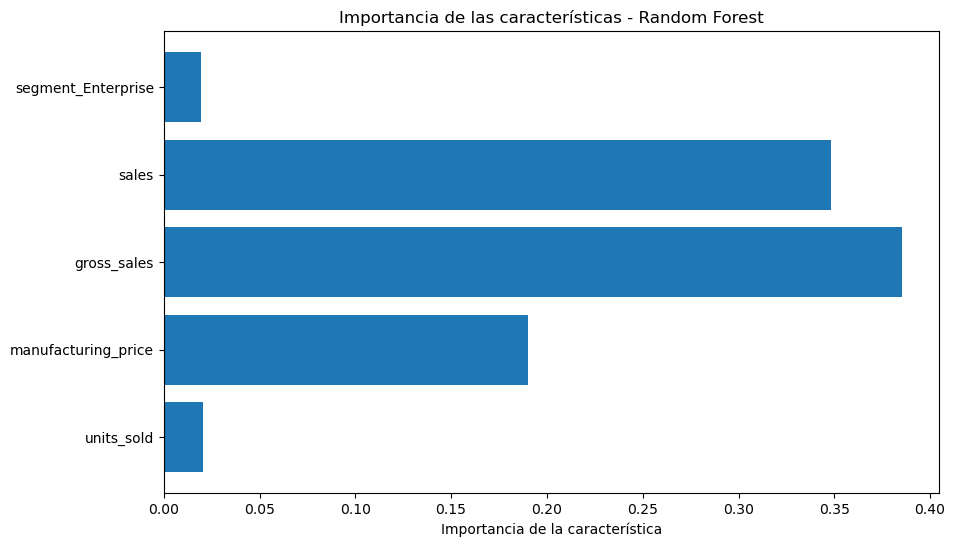


Ajustando Gradient Boosting Regressor con todas las características...
Gradient Boosting - MSE: 85579541818964.78, R2: 0.9815


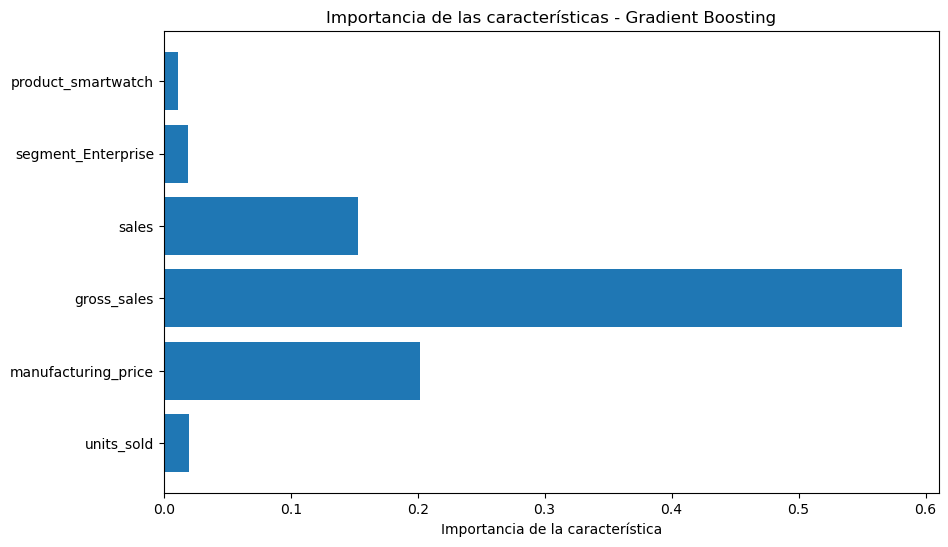


Resumen de rendimiento de los modelos:
Gradient Boosting - MSE: 85579541818964.78, R2: 0.9815
Random Forest - MSE: 166212930750759.28, R2: 0.9641


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Dividir los datos en variables predictoras y objetivo
X = correlation_data_encoded.drop(columns=['Net Profit', 'sale_price', 'Profit'])  # Variables predictoras
y = correlation_data_encoded['Net Profit']  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar Random Forest Regressor usando todas las características
print("\nAjustando Random Forest Regressor con todas las características...")
rf_best = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_best.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances_rf = rf_best.feature_importances_

# Seleccionar características con importancia mayor a 0.01
important_features_rf = X.columns[feature_importances_rf > 0.01]

# Crear los conjuntos de entrenamiento y prueba con las características importantes
X_train_rf = X_train[important_features_rf]
X_test_rf = X_test[important_features_rf]

# Evaluar el rendimiento del modelo Random Forest usando el conjunto de prueba completo
y_pred_rf = rf_best.predict(X_test)  # Usamos todas las características para la predicción
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf:.2f}, R2: {r2_rf:.4f}")

# Gráfico de la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(important_features_rf, feature_importances_rf[feature_importances_rf > 0.01])
plt.xlabel('Importancia de la característica')
plt.title('Importancia de las características - Random Forest')
plt.show()

# Ajustar Gradient Boosting Regressor con todas las características
print("\nAjustando Gradient Boosting Regressor con todas las características...")
gbr = GradientBoostingRegressor(n_estimators=200, max_depth=10, random_state=42)
gbr.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances_gbr = gbr.feature_importances_

# Seleccionar características con importancia mayor a 0.01
important_features_gbr = X.columns[feature_importances_gbr > 0.01]

# Crear los conjuntos de entrenamiento y prueba con las características importantes
X_train_gbr = X_train[important_features_gbr]
X_test_gbr = X_test[important_features_gbr]

# Evaluar el rendimiento del modelo Gradient Boosting usando el conjunto de prueba completo
y_pred_gbr = gbr.predict(X_test)  # Usamos todas las características para la predicción
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"Gradient Boosting - MSE: {mse_gbr:.2f}, R2: {r2_gbr:.4f}")

# Gráfico de la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(important_features_gbr, feature_importances_gbr[feature_importances_gbr > 0.01])
plt.xlabel('Importancia de la característica')
plt.title('Importancia de las características - Gradient Boosting')
plt.show()

# Comparar los resultados
print("\nResumen de rendimiento de los modelos:")
models = ['Gradient Boosting', 'Random Forest']
mse_values = [mse_gbr, mse_rf]
r2_values = [r2_gbr, r2_rf]
for model, mse, r2 in zip(models, mse_values, r2_values):
    print(f"{model} - MSE: {mse:.2f}, R2: {r2:.4f}")


SHAP

In [69]:
!pip install shap

   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   ----- ---------------------------------- 61.4/456.1 kB 1.7 MB/s eta 0:00:01
   -------------------------- ------------- 297.0/456.1 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
import shap  # Importar SHAP para la interpretabilidad

# Análisis de interpretabilidad con SHAP
print("\nGenerando gráficos de interpretabilidad con SHAP...")
explainer = shap.Explainer(gbr, X_test)  # Crear el objeto explainer de SHAP
shap_values = explainer(X_test)

# Gráfico de resumen SHAP
shap.summary_plot(shap_values, X_test)

# Gráfico de dependencia de una característica importante
# Sustituye 'feature_name' por una característica importante
important_feature = X.columns[np.argmax(feature_importances_gbr)]
shap.dependence_plot(important_feature, shap_values.values, X_test)


Generando gráficos de interpretabilidad con SHAP...


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

Después de identificar las características más influyentes, realiza simulaciones para ver cómo cambiar estas variables afecta el beneficio neto. Esto te permitirá formular políticas específicas.

In [ ]:
# Crear un escenario base usando todas las características (mismas que en el entrenamiento)
scenario_base = X_test.mean().to_frame().T  # Promedio de todas las características
print("Escenario base:")
print(scenario_base)

# Simulaciones para cada característica influyente
simulations = []
for feature in important_features_gbr:
    scenario_modified = scenario_base.copy()  # Copiar el escenario base
    scenario_modified[feature] = scenario_modified[feature] * 1.1  # Incrementar un 10%
    
    # Predecir el beneficio neto para el escenario modificado
    predicted_profit = gbr.predict(scenario_modified)[0]  # Usar todas las características
    simulations.append({
        "Feature": feature,
        "Original Value": scenario_base[feature].values[0],
        "Modified Value": scenario_modified[feature].values[0],
        "Predicted Profit": predicted_profit
    })

# Convertir las simulaciones en un DataFrame para su análisis
simulations_df = pd.DataFrame(simulations)
print(simulations_df)



Escenario base:
    units_sold  manufacturing_price    gross_sales     discounts  \
0  1608.635714                101.2  206534.610714  14004.733071   

           sales        cogs  month_number         year  segment_Enterprise  \
0  192529.877643  164516.125      7.985714  2013.792857            0.171429   

   segment_Government  ...  month_name_ December   month_name_ February   \
0            0.414286  ...               0.164286               0.035714   

   month_name_ January   month_name_ July   month_name_ June   \
0              0.035714           0.078571           0.114286   

   month_name_ March   month_name_ May   month_name_ November   \
0            0.035714          0.085714               0.092857   

   month_name_ October   month_name_ September   
0              0.192857                0.071429  

[1 rows x 35 columns]
               Feature  Original Value  Modified Value  Predicted Profit
0           units_sold     1608.635714     1769.499286      1.545613e+07
1 

Para analizar cómo incrementar units_sold afecta a las demás variables y, en última instancia, al beneficio neto, podemos plantear el análisis de esta manera:

In [72]:
import numpy as np

# Copia del conjunto de prueba
scenario_modified = X_test.copy()

# Incrementar `units_sold` en un 10%
increment_percentage = 0.03
scenario_modified["units_sold"] = scenario_modified["units_sold"] * (1 - increment_percentage)

# Predecir el beneficio neto para el escenario modificado
y_pred_modified = gbr.predict(scenario_modified)

# Comparar con el escenario original
y_pred_original = gbr.predict(X_test)
profit_change = y_pred_modified - y_pred_original

# Analizar el impacto promedio
average_change = np.mean(profit_change)
print(f"El incremento del 10% en `units_sold` genera un cambio promedio en el beneficio neto de: {average_change:.2f} unidades monetarias.")


El incremento del 10% en `units_sold` genera un cambio promedio en el beneficio neto de: 6927.36 unidades monetarias.
